## ResNet50

A residual neural network (also referred to as a residual network or ResNet)[1] is a deep learning architecture in which the weight layers learn residual functions with reference to the layer inputs. It was developed in 2015 for image recognition and won that year's ImageNet Large Scale Visual Recognition Challenge : allows networks to go much deeper (up to hundreds of layers) while maintaining good training efficiency. The main difference in ResNets is that they have shortcut connections parallel to their normal convolutional layers. Contrary to convolution layers, these shortcut connections are always alive and the gradients can easily back propagate through them, which results in a faster training.

It is an innovative neural network created for image classification.

The ResNet model architecture allows the training error to be reduced with a deeper network through connection skip.

Residual neural networks ignore some connections and make double or triple layer jumps that contain non-linearities (ReLU)

## Transfer Learning
-If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data.

saving resources
improving efficiency
model training facilitation
saving time
The task is to transfer the learning from a ResNet50, trained with Imagenet dataset, to a model that classifies flower images -Transfer learning is a machine learning technique where a model trained on one task is reused or fine-tuned for a different but related task. Instead of training a new model from scratch, transfer learning leverages the knowledge gained from a pre-trained model, allowing it to achieve better performance with less data and computation on the new task. This approach is especially effective when the new task has limited labeled data.

To show how Transfer Learning can be useful, ResNet50 will be trained on a custom dataset.

#### Use Case : Flower Classification
Flower types - daisy, dandelion, roses, sunflowers, tulips
To classify flower images, the Flower Classification dataset will be used. It is available on Kaggle : 
The dataset contains 5 types of flowers:

*daisy

*dandelion

*roses

*sunflowers

*tulips

In [2]:
!pip install tensorflow


     |████████████████████████████████| 601.3 MB 15 kB/s s eta 0:00:013�██████████▏        | 435.9 MB 82.5 MB/s eta 0:00:03
     |████████████████████████████████| 5.1 MB 61.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 84.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 82.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 65.5 MB/s eta 0:00:01
     |████████████████████████████████| 24.5 MB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 63.9 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 80.3 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 69.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 80.6 MB/s eta 0:00:01


In [14]:
# Import Keras applications module
import keras.applications as apps

# List all available pre-trained models in keras.applications
available_models = [model for model in dir(apps) if callable(getattr(apps, model))]

# Print the available models
for model in available_models:
    print(model)


ConvNeXtBase
ConvNeXtLarge
ConvNeXtSmall
ConvNeXtTiny
ConvNeXtXLarge
DenseNet121
DenseNet169
DenseNet201
EfficientNetB0
EfficientNetB1
EfficientNetB2
EfficientNetB3
EfficientNetB4
EfficientNetB5
EfficientNetB6
EfficientNetB7
EfficientNetV2B0
EfficientNetV2B1
EfficientNetV2B2
EfficientNetV2B3
EfficientNetV2L
EfficientNetV2M
EfficientNetV2S
InceptionResNetV2
InceptionV3
MobileNet
MobileNetV2
MobileNetV3Large
MobileNetV3Small
NASNetLarge
NASNetMobile
ResNet101
ResNet101V2
ResNet152
ResNet152V2
ResNet50
ResNet50V2
VGG16
VGG19
Xception


In [15]:
import tensorflow as tf

# List available physical devices
gpus = tf.config.list_physical_devices('GPU')
print("GPUs available:", gpus)


GPUs available: []


In [1]:
! pip install torchvision


     |████████████████████████████████| 7.0 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 797.1 MB 2.9 kB/s eta 0:00:0113     |██████████                      | 247.0 MB 7.2 MB/s eta 0:01:17     |██████████████▋                 | 365.0 MB 109.8 MB/s eta 0:00:04
     |████████████████████████████████| 410.6 MB 6.3 kB/s  eta 0:00:01
     |████████████████████████████████| 664.8 MB 5.6 kB/s  eta 0:00:01
     |████████████████████████████████| 124.2 MB 22 kB/s s eta 0:00:01
     |████████████████████████████████| 196.0 MB 48 kB/s s eta 0:00:01
     |████████████████████████████████| 23.7 MB 20.6 MB/s eta 0:00:01    |█████████▊                      | 7.2 MB 27.8 MB/s eta 0:00:01
     |████████████████████████████████| 823 kB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 56.5 MB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 209.4 MB 80 kB/s s eta 0:00:01
     |███████████████

In [16]:
from torchvision.models import resnet50, ResNet50_Weights

# Load the pre-trained ResNet50 model
model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [17]:
# Print all weights (parameters) of the model
for name, param in model.named_parameters():
    print(f"Layer: {name} | Shape: {param.shape} | Weights: {param}")

Layer: conv1.weight | Shape: torch.Size([64, 3, 7, 7]) | Weights: Parameter containing:
tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
           -2.0325e-02,  8.8140e-03],
          [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
            2.9346e-02, -5.8331e-02],
          [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
            2.1868e-01, -7.2909e-02],
          ...,
          [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
           -5.7855e-01,  2.2461e-01],
          [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
           -4.9317e-02, -6.8082e-02],
          [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
            1.8976e-01, -2.2302e-02]],

         [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
           -6.5541e-02,  1.6895e-02],
          [-3.3543e-02,  3.9067e-02,  8.6565e-02,  ...,  1.1713e-01,
            2.1848e-02, -4.4082e-02],
          [ 5.5285e-02, -2.6424e-01,  4

In [4]:
# Print the number of nodes in each layer (based on the shape of the weights)
for name, param in model.named_parameters():
    if "weight" in name:  # Focus only on weight parameters
        shape = param.shape
        
        # For fully connected (Linear) layers, print the input/output node count
        if len(shape) == 2:
            print(f"Layer: {name} | Input Nodes: {shape[1]} | Output Nodes: {shape[0]}")
        
        # For convolutional layers, print the input/output channels
        elif len(shape) == 4:
            print(f"Layer: {name} | Input Channels: {shape[1]} | Output Channels: {shape[0]}")

Layer: conv1.weight | Input Channels: 3 | Output Channels: 64
Layer: layer1.0.conv1.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.0.conv2.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.0.conv3.weight | Input Channels: 64 | Output Channels: 256
Layer: layer1.0.downsample.0.weight | Input Channels: 64 | Output Channels: 256
Layer: layer1.1.conv1.weight | Input Channels: 256 | Output Channels: 64
Layer: layer1.1.conv2.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.1.conv3.weight | Input Channels: 64 | Output Channels: 256
Layer: layer1.2.conv1.weight | Input Channels: 256 | Output Channels: 64
Layer: layer1.2.conv2.weight | Input Channels: 64 | Output Channels: 64
Layer: layer1.2.conv3.weight | Input Channels: 64 | Output Channels: 256
Layer: layer2.0.conv1.weight | Input Channels: 256 | Output Channels: 128
Layer: layer2.0.conv2.weight | Input Channels: 128 | Output Channels: 128
Layer: layer2.0.conv3.weight | Input Channels: 128 | Outp

In [5]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'dog.JPG'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

2024-09-24 21:47:24.458874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 21:47:24.647376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 21:47:24.701881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 21:47:25.104725: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02110806', 'basenji', 0.99932647), ('n02091244', 'Ibizan_hound', 0.00016836998), ('n02115913', 'dhole', 8.402365e-05)]


In [7]:
!pip install requests
import requests
import torch
import numpy as np
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image

# Load the pre-trained ResNet50 model
model = resnet50(weights=ResNet50_Weights.DEFAULT)


# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = 'dog.JPG'
img = Image.open(img_path)
img = transform(img)  # Apply transformations
img = img.unsqueeze(0)  # Add batch dimension

# Perform prediction
with torch.no_grad():  # Disable gradient calculation
    preds = model(img)
# Apply softmax to get probabilities
probabilities = torch.nn.functional.softmax(preds, dim=1)

# Get the top 3 predicted classes
_, predicted_classes = torch.topk(probabilities, k=3)

# Load class labels (if using ImageNet classes)
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

# Print the predicted classes with probabilities
for i in range(3):
    print(f'Predicted: {labels[predicted_classes[0][i]]} with probability: {probabilities[0][predicted_classes[0][i]].item():.4f}')

Predicted: Basenji with probability: 0.0057
Predicted: Ibizan Hound with probability: 0.0027
Predicted: Whippet with probability: 0.0025


In [8]:
print("Raw logits:", preds.shape)
print(preds)
# we have in the output of ResNet50 model 1000 categories so we have 1000 predictions we take topk

Raw logits: torch.Size([1, 1000])
tensor([[ 7.8072e-02,  3.5595e-02,  2.7416e-02,  3.1561e-01,  1.0612e-01,
          1.3244e-01,  1.8768e-03,  5.4647e-02,  1.9921e-01,  1.7373e-02,
         -7.1650e-02, -2.7574e-01, -1.0984e-02,  1.0869e-01, -1.5342e-01,
         -3.6632e-02,  3.6851e-02, -5.6760e-02,  6.7924e-02, -1.4954e-01,
          2.8074e-01,  2.0592e-01,  2.3212e-01,  3.7937e-01,  1.5933e-02,
         -2.1579e-01,  8.3127e-02, -6.2695e-03, -5.2891e-02,  3.0844e-01,
         -7.4150e-02, -1.1722e-01,  1.6057e-02,  5.9544e-02,  1.5946e-01,
          1.9630e-01,  2.1423e-01,  5.0170e-02, -1.4871e-02,  5.2556e-02,
         -3.8383e-02,  2.2233e-01,  2.2035e-02, -1.2485e-01,  1.9088e-01,
          1.4270e-01, -1.5535e-01, -5.7931e-02,  4.6140e-02,  1.4480e-01,
         -9.9978e-02,  1.0829e-01,  1.7180e-01,  3.7731e-02, -1.7556e-03,
         -1.8933e-01, -1.6605e-02, -1.2725e-01, -4.6932e-03, -1.4971e-01,
          1.0166e-01, -1.1006e-01, -1.4433e-01,  3.0625e-02, -4.3936e-02,
    

In [18]:
import sys
print(sys.version)
print(sys.executable)
!pip install split-folders


3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
/opt/conda/bin/python


In [19]:
# display, transform, read, split ...

import numpy as np

import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

Feature Map 1 Values:
[[ 0.07140657  0.14655189  0.09254767 ... -0.09027513 -0.05510072
   0.2916572 ]
 [ 0.04190916  0.02944955  0.07517891 ... -0.01825631 -0.00782557
   0.05351342]
 [-0.00580268 -0.05344408 -0.04990213 ... -0.07366368 -0.03731475
   0.0609524 ]
 ...
 [-1.0285009  -1.7231606  -1.7513137  ... -2.7747924  -2.5992067
  -2.2211342 ]
 [ 1.267369    1.8160188   2.0743423  ...  2.499887    2.5304666
   1.8750831 ]
 [ 0.5767577   0.9429068   1.1656201  ...  0.99180335  1.086633
   0.79761577]]

Feature Map 2 Values:
[[ 1.4657406   1.0927192   0.6662285  ... -0.23224433 -0.21293072
  -0.16245353]
 [ 1.6148934   1.2272063   0.6303647  ... -0.52153856 -0.49992564
  -0.38405433]
 [ 1.6772659   1.2772592   0.6571104  ... -0.4627811  -0.4111187
  -0.23061532]
 ...
 [ 0.9350462   1.144152    0.75852644 ...  2.5301185   2.360719
   2.7017763 ]
 [ 0.57935256  0.8602047   0.6870483  ...  1.8657931   1.7762338
   2.0222685 ]
 [-0.8906058  -0.96267265 -1.0312152  ... -0.94688493 -0.9705

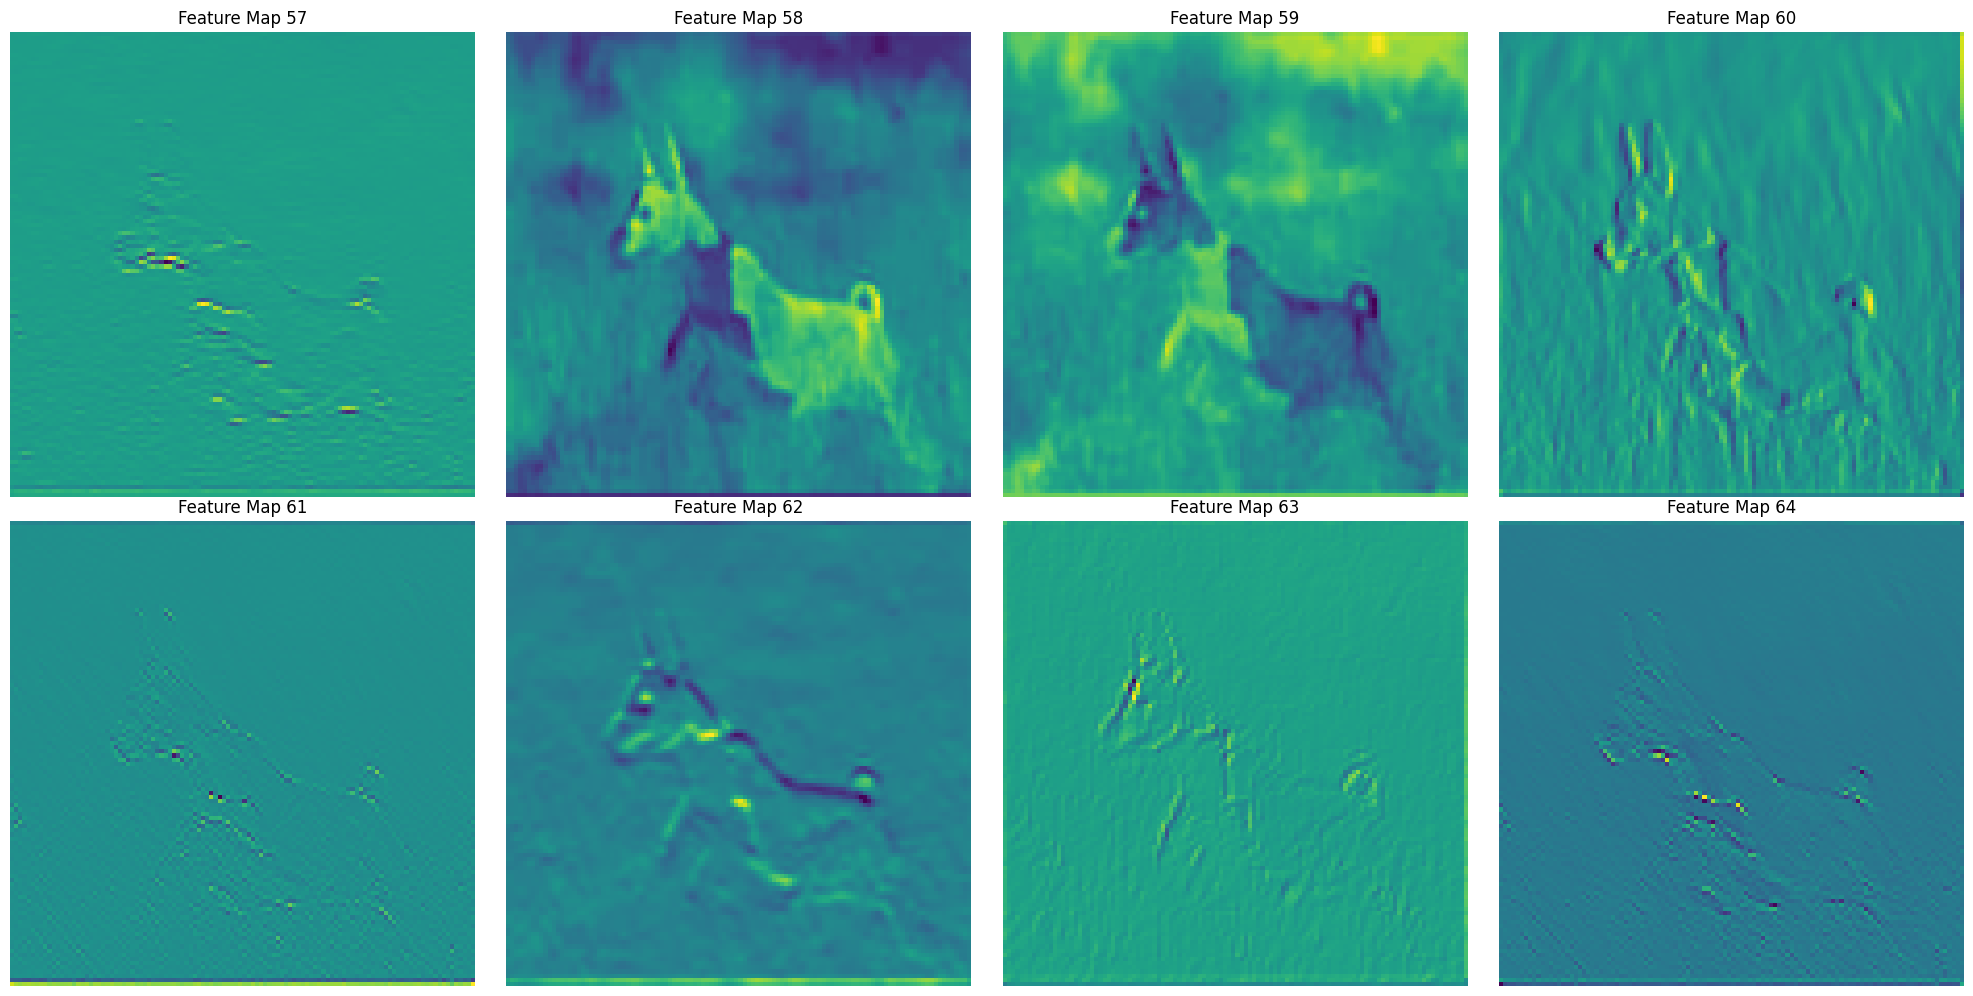

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image
# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_path='dog.JPG'
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Extract features from the conv1 layer
with torch.no_grad():
    conv1_output = model.conv1(img_tensor)


# Select the last 8 feature maps
feature_maps = conv1_output[0]  # Remove batch dimension
last_to_show = feature_maps[-8:]  # Select the last 8 feature maps

# Print the values of the last 8 feature maps
for i in range(last_to_show.shape[0]):
    print(f'Feature Map {i + 1} Values:')
    print(last_to_show[i].cpu().numpy())  # Convert to NumPy array for easier reading
    print()  # New line for better readability
plt.figure(figsize=(20, 10))
for i in range(last_to_show.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(last_to_show[i].cpu().numpy(), cmap='viridis')
    plt.axis('off')
    plt.title(f'Feature Map {64 - 8 + i + 1}')  # Label with the actual map number

plt.tight_layout()
plt.show()

Output of the last residual block in layer1:
torch.Size([1, 256, 56, 56])
[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [8.6279207e-01 1.0523318e+00 7.4067980e-01 ... 1.4786359e+00
    2.4655969e+00 2.8733335e+00]
   [9.1039795e-01 5.2752531e-01 7.6473969e-01 ... 1.6359468e+00
    2.3483608e+00 2.4336505e+00]
   ...
   [0.0000000e+00 4.7321421e-01 4.5474809e-01 ... 2.4505168e-02
    0.0000000e+00 1.2632288e+00]
   [4.7609985e-02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 5.2733374e-01]
   [0.0000000e+00 5.7135838e-01 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]]

  [[1.1973472e+00 7.5021112e-01 1.5918941e+00 ... 0.0000000e+00
    1.0007457e+00 1.6930684e+00]
   [1.9800203e+00 1.0220370e+00 1.5146493e+00 ... 3.2304633e-01
    1.7717417e+00 2.0335126e+00]
   [1.2872580e+00 1.3149196e+00 9.9566990e-01 ... 2.5180280e-01
    1.9270794e+00 1.8646493e+00]
   ...
   [3.4023352e+00 1.4922612e+00 2.687

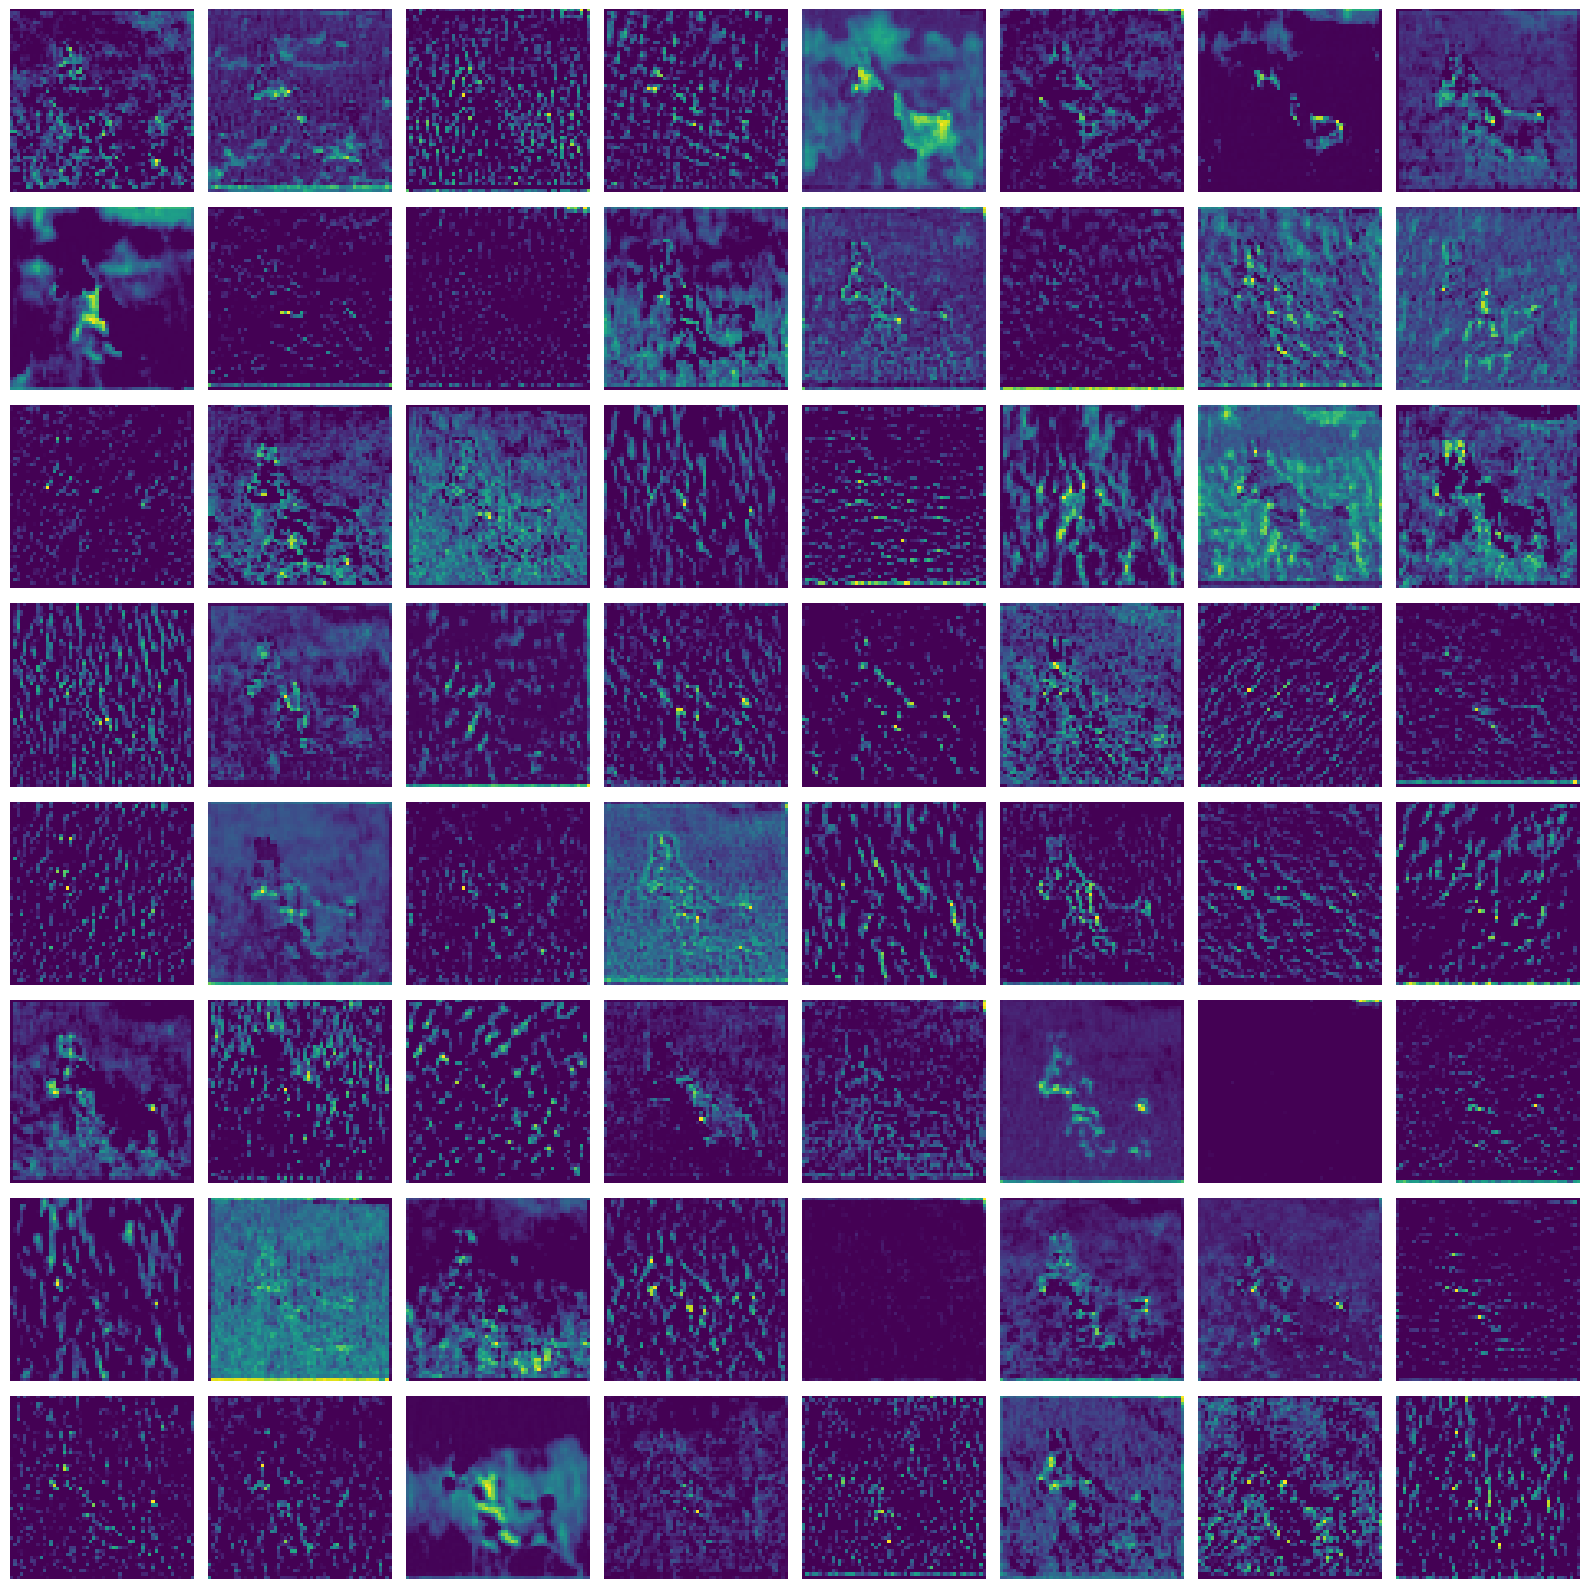

In [21]:
# Forward pass through initial layers
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through all blocks in layer1 (stage 1)
    for block in model.layer1:
        x = block(x)

# x now contains the output of the last residual block in layer1
print('Output of the last residual block in layer1:')
print(x.shape)  # Print the shape of the output tensor
print(x.data.cpu().numpy())  # Print the values (this can be large)

# x now contains the output of the last residual block in layer1
# Extracting the feature maps
feature_maps = x.squeeze(0)  # Remove the batch dimension
num_feature_maps = feature_maps.size(0)

# Set up the figure for plotting
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.flatten()

# Visualize the first 64 feature maps
for i in range(64):
    ax = axes[i]
    ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

Output of the last residual block in layer 4:
torch.Size([1, 1024, 14, 14])


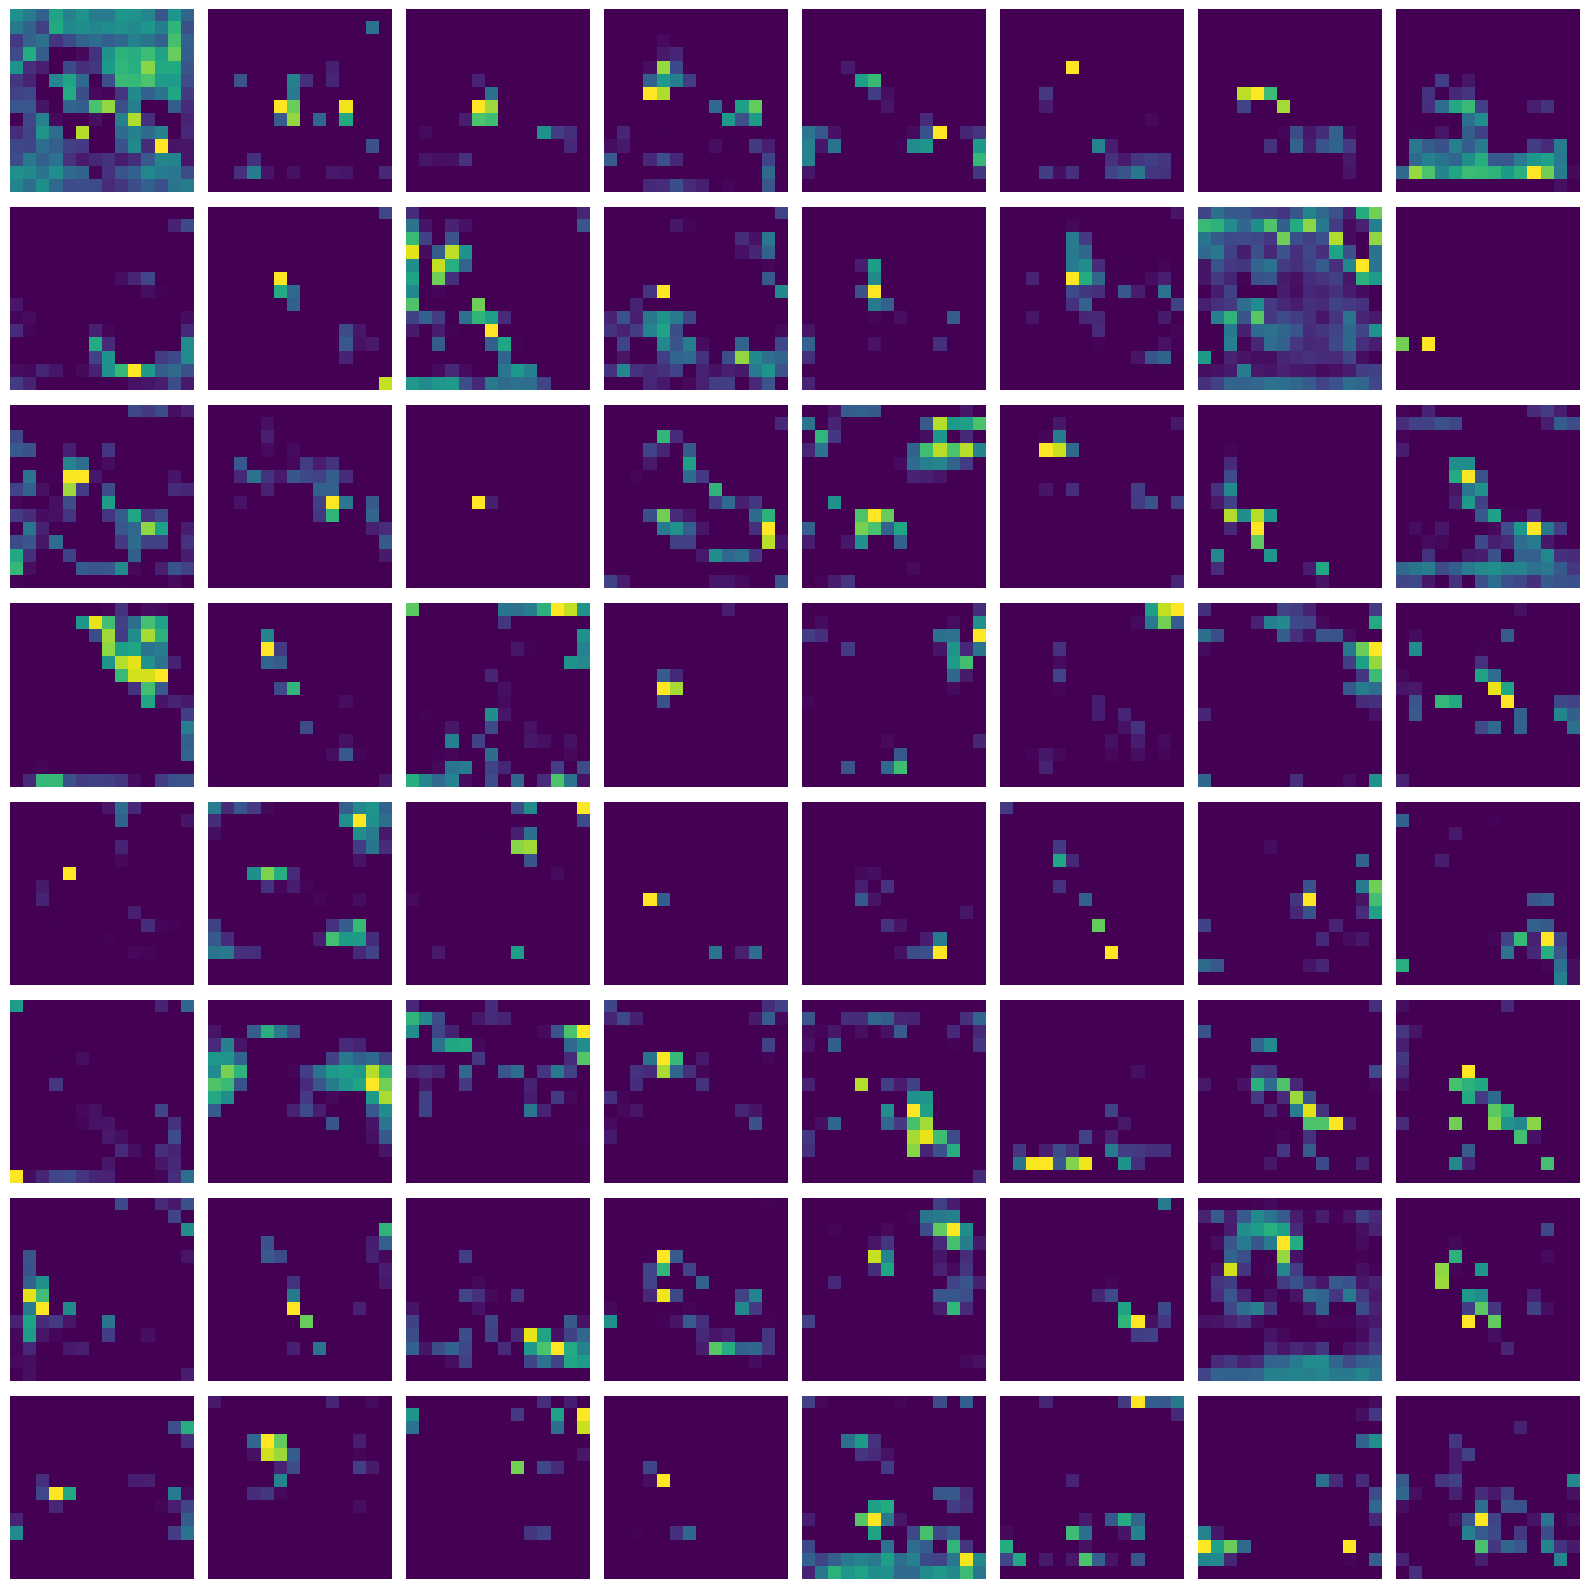

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image

# Load the pre-trained ResNet50 model
model = resnet50(weights='IMAGENET1K_V1')
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = 'dog.JPG'  # Replace with your image path
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Forward pass through initial layers and the first three stages
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through layer 1
    for block in model.layer1:
        x = block(x)

    # Pass through layer 2
    for block in model.layer2:
        x = block(x)

    # Pass through layer 3
    for block in model.layer3:
        x = block(x)

  
  

# x now contains the output of the last residual block in layer 4
print('Output of the last residual block in layer 4:')
print(x.shape)  # Print the shape of the output tensor

# Extracting the feature maps
feature_maps = x.squeeze(0)  # Remove the batch dimension
num_feature_maps = feature_maps.size(0)

# Set up the figure for plotting
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.flatten()

# Visualize the first 64 feature maps
for i in range(min(64, num_feature_maps)):  # Ensure we don't exceed available feature maps
    ax = axes[i]
    ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()


Output of the last residual block in layer 4:
torch.Size([1, 2048, 7, 7])


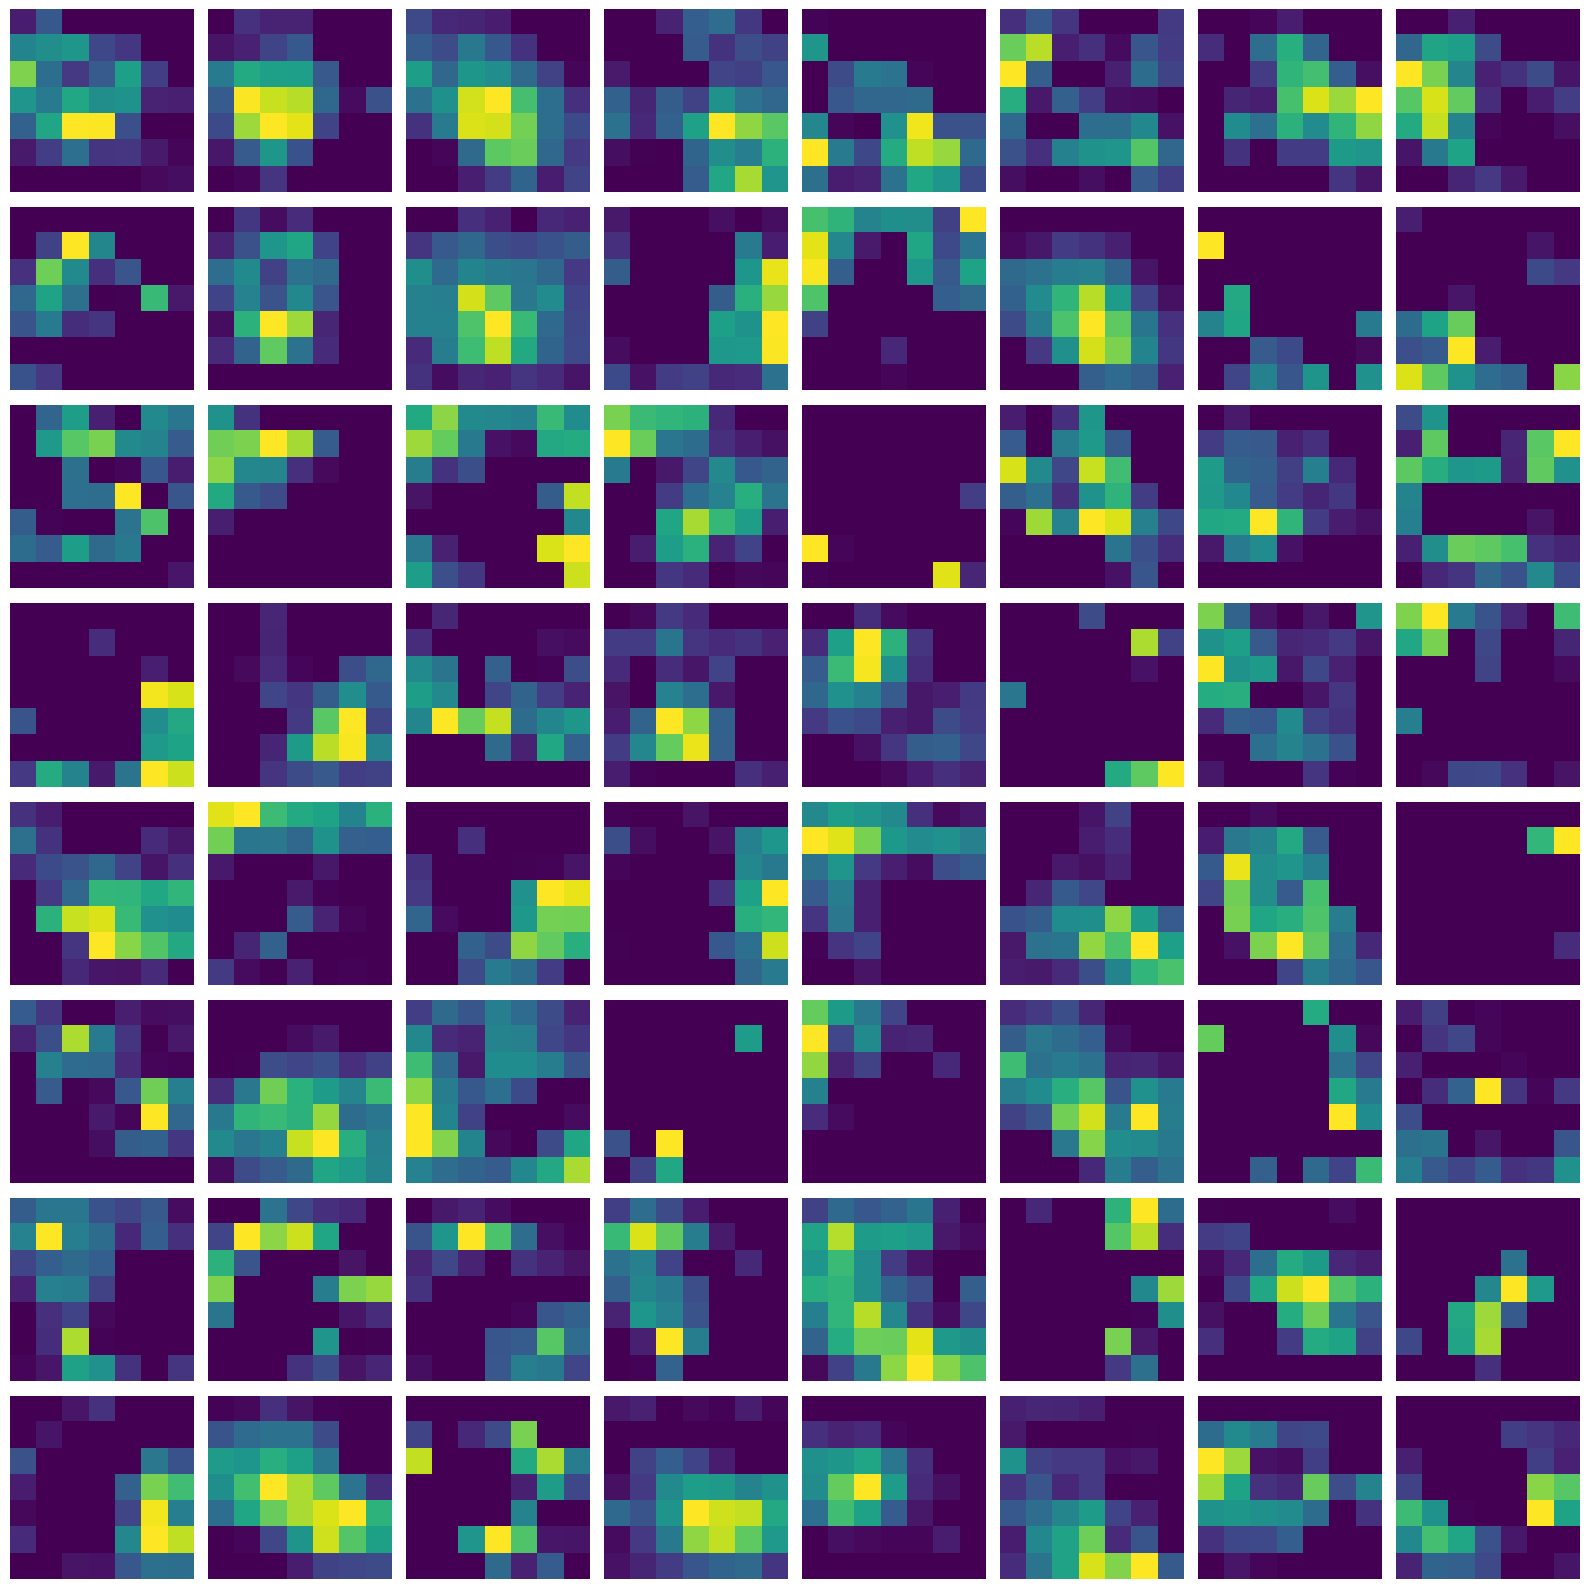

In [24]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image

# Load the pre-trained ResNet50 model
model = resnet50(weights='IMAGENET1K_V1')
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = 'dog.JPG'  # Replace with your image path
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Forward pass through initial layers and the first three stages
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through layer 1
    for block in model.layer1:
        x = block(x)

    # Pass through layer 2
    for block in model.layer2:
        x = block(x)

    # Pass through layer 3
    for block in model.layer3:
        x = block(x)


   # Pass through layer 3
    for block in model.layer4:
        x = block(x)
# x now contains the output of the last residual block in layer 4
print('Output of the last residual block in layer 4:')
print(x.shape)  # Print the shape of the output tensor

# Extracting the feature maps
feature_maps = x.squeeze(0)  # Remove the batch dimension
num_feature_maps = feature_maps.size(0)

# Set up the figure for plotting
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.flatten()

# Visualize the first 64 feature maps
for i in range(min(64, num_feature_maps)):  # Ensure we don't exceed available feature maps
    ax = axes[i]
    ax.imshow(feature_maps[i].cpu().numpy(), cmap='viridis')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image
import requests

# Load the pre-trained ResNet50 model
model = resnet50(weights='IMAGENET1K_V1')
model.eval()

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
img_path = 'dog.JPG'  # Replace with your image path
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Forward pass through the model
with torch.no_grad():
    x = model.conv1(img_tensor)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    # Pass through layer 1
    for block in model.layer1:
        x = block(x)

    # Pass through layer 2
    for block in model.layer2:
        x = block(x)

    # Pass through layer 3
    for block in model.layer3:
        x = block(x)

    # Pass through layer 4
    for block in model.layer4:
        x = block(x)

    # Average Pooling
    x = model.avgpool(x)

    # Flatten the output for the fully connected layer
    x = torch.flatten(x, 1)  # Flatten to (batch_size, num_features)
    
    # Fully connected layer
    x = model.fc(x)

# Output of the fully connected layer
print('Output of the fully connected layer:')
print(x.shape)  # Print the shape of the output tensor

# Apply softmax to get probabilities
probabilities = torch.softmax(x, dim=1)

# Get the top 5 predicted classes and their probabilities
top_probs, top_classes = torch.topk(probabilities, k=5)

# Load class labels (ImageNet)
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

# Print the top predicted classes and their probabilities
for i in range(top_probs.size(1)):
    print(f"Predicted: {labels[top_classes[0][i]]} with probability: {top_probs[0][i].item():.4f}")





Output of the fully connected layer:
torch.Size([1, 1000])
Predicted: Basenji with probability: 0.9995
Predicted: toy terrier with probability: 0.0001
Predicted: dingo with probability: 0.0001
Predicted: Pembroke Welsh Corgi with probability: 0.0001
Predicted: Ibizan Hound with probability: 0.0000


In [26]:
# python librairies installation
!pip install split-folders matplotlib opencv-python spicy

     |████████████████████████████████| 62.5 MB 73 kB/s  eta 0:00:01


In [27]:
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import splitfolders


In [38]:
import splitfolders
import os

# Define input and output paths
input_folder = 'flowers'  # Path to your dataset
output_folder = 'data_split'     # Path where the split will be saved

# Check if the input folder exists
if os.path.isdir(input_folder):
    print("Input folder exists.")
else:
    print("Input folder does not exist.")

# Split the dataset
splitfolders.ratio(
    input_folder,        # Input folder
    output_folder,       # Output folder
    ratio=(0.7, 0.2, 0.1),  # Train, validation, test ratio
    seed=1337            # Seed for reproducibility
)

print("Dataset split completed.")


Input folder exists.


Copying files: 3670 files [00:00, 5596.04 files/s]

Dataset split completed.


In [50]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False
#This prevents the pre-trained layers from changing, allowing the model to use pre-learned features and focus on learning the new custom classification task with fewer parameters.

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model

# Define the data generators
datagen = ImageDataGenerator()
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Training data
train_generator = datagen.flow_from_directory(
    directory="data_split/train",
    classes=class_names,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical"
)

# Validation data
valid_generator = datagen.flow_from_directory(
    directory="data_split/val",
    classes=class_names,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical"
)

# Test data
test_generator = datagen.flow_from_directory(
    directory="data_split/test",
    classes=class_names,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical"
)

# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in resnet_50.layers:
    layer.trainable = False

# Build the custom model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(5, activation='softmax')(x)

model = Model(inputs=resnet_50.input, outputs=predictions)

# Define the training function
def trainModel(model, epochs, optimizer):
    batch_size = 64
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs)

# Train the model
model_history = trainModel(model=model, epochs=10, optimizer="Adam")


Found 2567 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Found 372 images belonging to 5 classes.
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 250s 6s/step - accuracy: 0.5492 - loss: 1.1376 - val_accuracy: 0.8413 - val_loss: 0.4424
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.8299 - loss: 0.4834 - val_accuracy: 0.8290 - val_loss: 0.4570
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.8674 - loss: 0.3890 - val_accuracy: 0.8673 - val_loss: 0.3575
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.8968 - loss: 0.3054 - val_accuracy: 0.8810 - val_loss: 0.3862
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 261s 6s/step - accuracy: 0.9093 - loss: 0.2493 - val_accuracy: 0.8851 - val_loss: 0.3431
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 238s 6s/step - accuracy: 0.9311 - loss: 0.1994 - val_accuracy: 0.8933 - val_loss: 0.3163
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.9453 - loss: 0.1561 - val_accuracy: 0.8700 - val_

==> The model exhibits strong performance with increasing accuracy and decreasing loss over the training epochs, particularly from Epoch 1 to Epoch 6.
==> Validation metrics indicate that the model generalizes well, although there are signs of potential overfitting by Epoch 7, as validation accuracy decreases slightly while training accuracy continues to rise.
Continuous monitoring and potentially introducing early stopping or regularization methods may enhance model robustness.
===>Overall, the results are promising, with the model demonstrating effective learning for the flower classification task. Further fine-tuning and additional epochs could lead to improved performance.

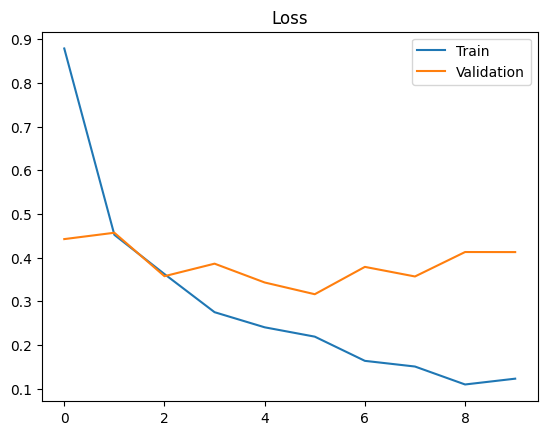

In [55]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

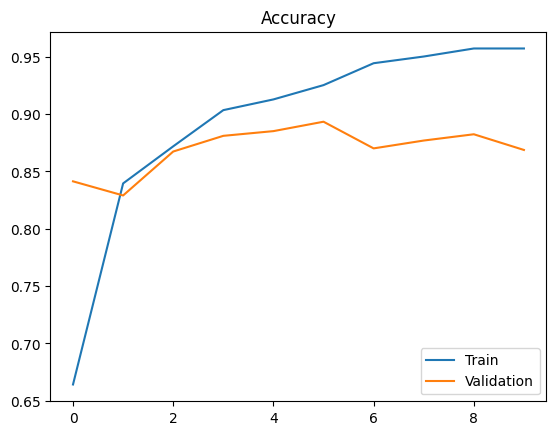

In [56]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [57]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8635 - loss: 0.4927
The test loss is:  0.4444520175457001
The best accuracy is:  86.82795763015747


In [60]:
import os
import pandas as pd
# Make predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from generator
true_classes = test_generator.classes

# Create a DataFrame for results
results = pd.DataFrame({
    'Image': test_generator.filenames,
    'True Class': [class_names[i] for i in true_classes],
    'Predicted Class': [class_names[i] for i in predicted_classes]
})

# Display the results
print(results)



6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step
                                  Image True Class Predicted Class
0      daisy/10466558316_a7198b87e2.jpg      daisy          tulips
1      daisy/105806915_a9c13e2106_n.jpg      daisy           roses
2      daisy/10712722853_5632165b04.jpg      daisy       dandelion
3      daisy/12891819633_e4c82b51e8.jpg      daisy           daisy
4     daisy/1306119996_ab8ae14d72_n.jpg      daisy          tulips
..                                  ...        ...             ...
367    tulips/8713394070_b24561b0a9.jpg     tulips           roses
368  tulips/8733586143_3139db6e9e_n.jpg     tulips          tulips
369  tulips/8817622133_a42bb90e38_n.jpg     tulips       dandelion
370  tulips/8838354855_c474fc66a3_m.jpg     tulips       dandelion
371  tulips/9030467406_05e93ff171_n.jpg     tulips           daisy

[372 rows x 3 columns]


In [61]:
# Step 7 - Save and export the model

# Define the model's filename
model_filename = 'flower_classification_model.h5'

# Save the model
model.save(model_filename)

print(f"Model saved to {model_filename}")


Model saved to flower_classification_model.h5


In [62]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model(model_filename)

print("Model loaded successfully!")


Model loaded successfully!


In [63]:
loaded_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,153,735 (92.14 MB)

 Trainable params: 566,021 (2.16 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

==>Transfer learning is a powerful technique that significantly reduces training time while enhancing model performance, particularly in tasks with limited data. By leveraging pre-trained models that have already learned rich feature representations from vast datasets, transfer learning allows practitioners to achieve high accuracy with fewer epochs. This approach not only accelerates the training process but also minimizes the risk of overfitting, as the model starts with a well-informed baseline. Consequently, transfer learning enables faster experimentation and deployment, making it an invaluable strategy for practitioners aiming to solve complex problems efficiently and effectively.